In [1]:
import numpy as np
import pandas as pd
import hist
from hist import Hist
import awkward as ak
import json
import uproot
import math
from coffea import util
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import mplhep
plt.style.use(mplhep.style.CMS)

In [2]:
out_dir = "../outfiles/Run3Summer22EE/cutflow/wo_n2ddt_ddb_jet_arbitration"

era = "Run3Summer22EE"

with open("../data/xsec/xsec.json", "r") as json_file:
    xs = json.load(json_file)
    
lumi = pickle.load(open(f'{out_dir}/mc.pkl','rb'))['lumi']

# Table of contents <a class="anchor" id="toc"></a>

* [Plotting QCD distributions](#qcd)
* [Pass vs Fail](#ddb)
* [pt ranges](#pt)
* [N2DDT efficiency per sample](#n2ddt1)

# Plotting QCD distributions <a class="anchor" id="qcd"></a>
[TOC](#toc)

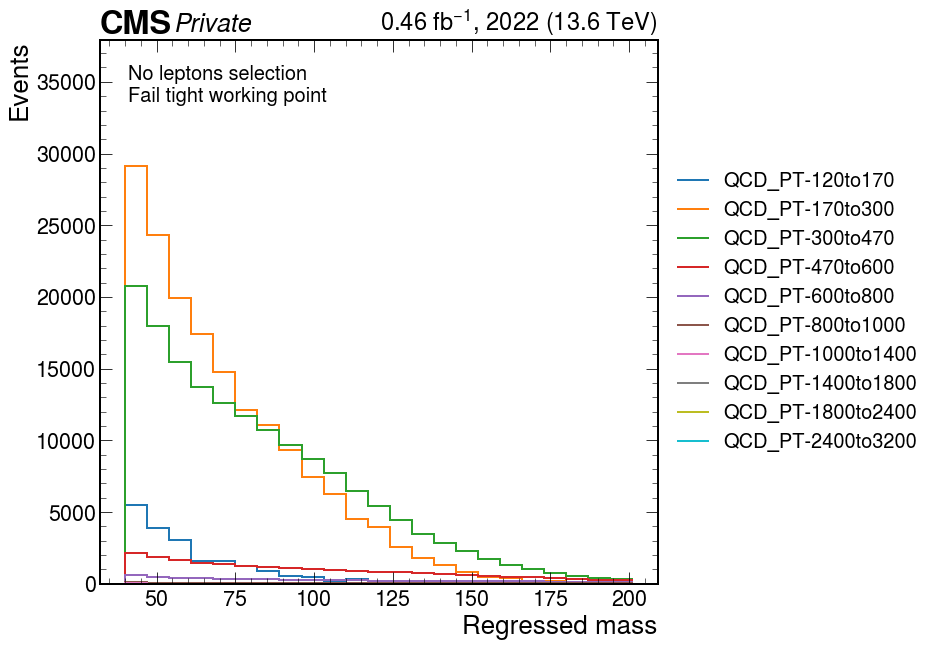

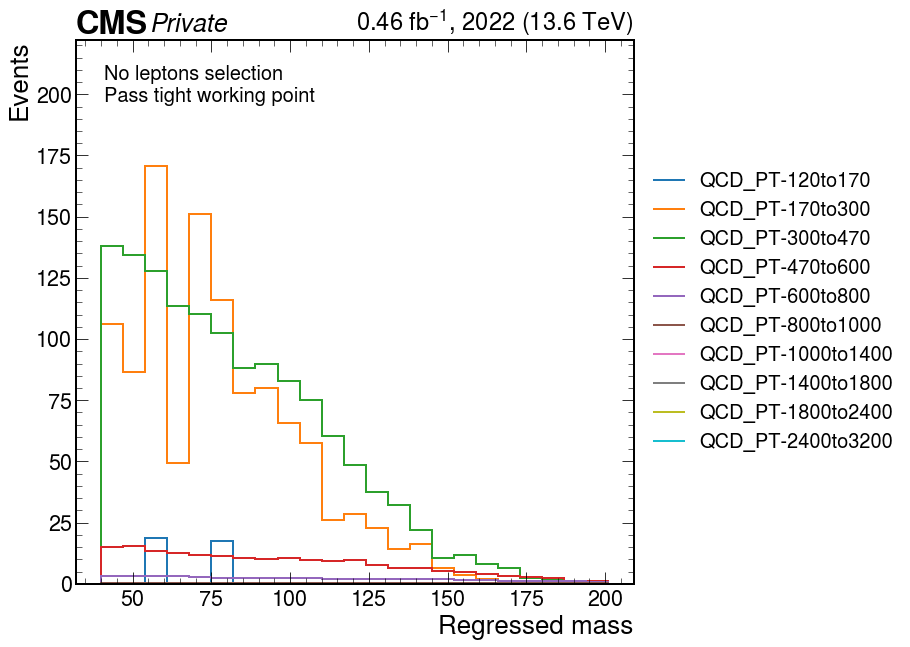

In [14]:
plt.style.use(mplhep.style.CMS)

mc = util.load(f"{out_dir}/dask_QCD.coffea")[0]
# "dataset" has to be first for the scaling to work
mc["hist"] = mc["hist"].project('dataset', 'reg', 'pt', 'disc', 'genflav', 'cut')

scale_lumi = {k: xs[k] * lumi / w for k, w in mc['sumw'].items()}

for i, name in enumerate(mc["hist"].axes["dataset"]):
    mc["hist"].view(flow=True)[i] *= scale_lumi[name]

wps = {
    1 : "loose",
    2 : "medium",
    3 : "tight",
}

wp = 3
i_sel = 6
selections = ['Baseline','Trigger','Min. kin.', 'Jet ID', r'$N^{1,DDT}_2$ < 0','MET','No leptons']

for region in ["Fail", "Pass"]:
    
    max_val = 0
    hs = []
    labels = []
    
    fig, (ax) = plt.subplots(
        1, 1, figsize=(10, 10),
    )
    fig.subplots_adjust(hspace=0.1)
    ax.set_ylabel("Events")

    for dataset in ['QCD_PT-120to170', 'QCD_PT-170to300', 'QCD_PT-300to470', 'QCD_PT-470to600', 'QCD_PT-600to800', 'QCD_PT-800to1000', 'QCD_PT-1000to1400', 'QCD_PT-1400to1800', 'QCD_PT-1800to2400', 'QCD_PT-2400to3200']:
        
        h = mc["hist"].project("reg", "cut", "dataset", "disc", "genflav", "pt")[
            :, i_sel, hist.loc(dataset), :, 0:len:sum, 0:len:sum
        ]
        
        if "Pass" in region:
            h = h[:, wp:len:sum]
        else:
            h = h[:, 0:wp:sum]
            
        if max(h.values()) > max_val:
            max_val = max(h.values())
            
        hs.append(h)
        labels.append(dataset)

    mplhep.histplot(
        hs,
        ax=ax,
        label=labels,
#         stack=True,
#         sort="y_r",
#         histtype="fill",
#         edgecolor="black",
        linewidth=2,
        yerr=False,
        flow="none",
    )
    
    plt.text(0.05, 0.88, f"{selections[i_sel]} selection\n{region} {wps[wp]} working point",
                fontsize=20,
                horizontalalignment='left',
                verticalalignment='bottom',
                transform=ax.transAxes
               )

    mplhep.cms.label(
            ax=ax, 
            data=True, 
            fontsize=25,
            label="Private",
            year=2022,
            lumi=f"{lumi/1000:.2f}",
            com=13.6,
            )
    
#     ax.set_yscale('log')
    ax.legend(fontsize=20, loc='center left', bbox_to_anchor=(1, 0.5))
    
    ax.set_ylim(0, max_val * 1.3)

# Pass versus fail <a class="anchor" id="ddb"></a>
[TOC](#toc)

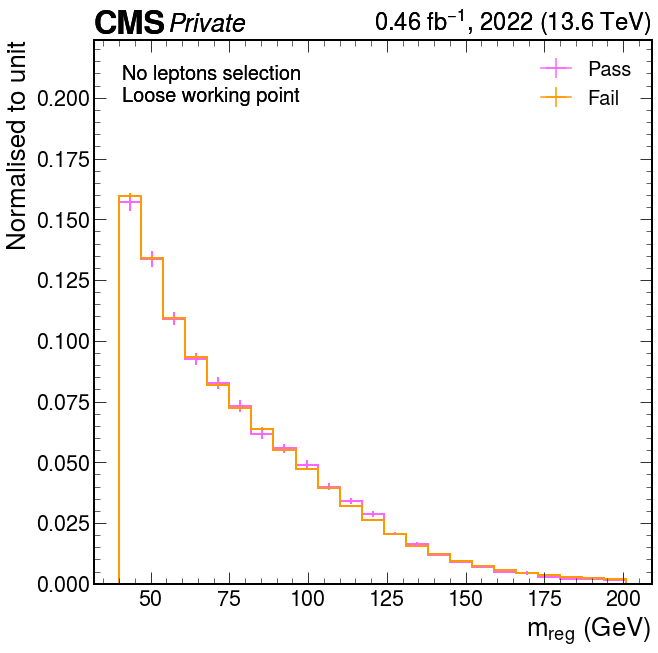

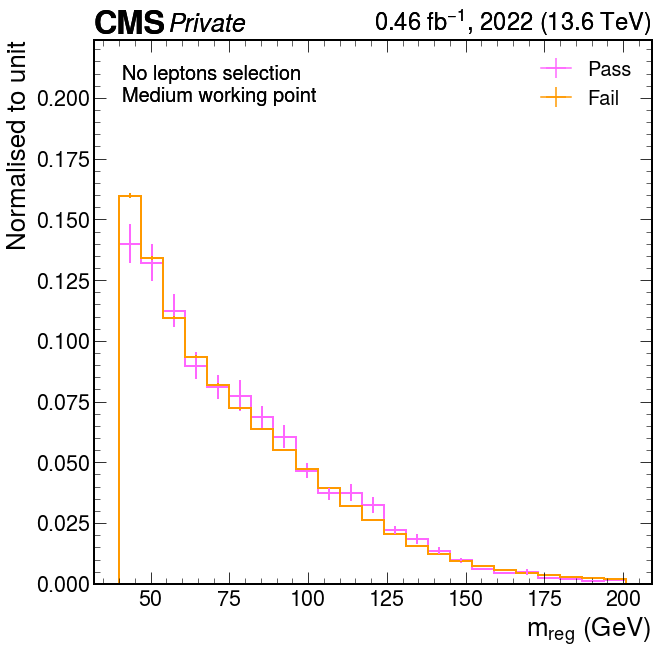

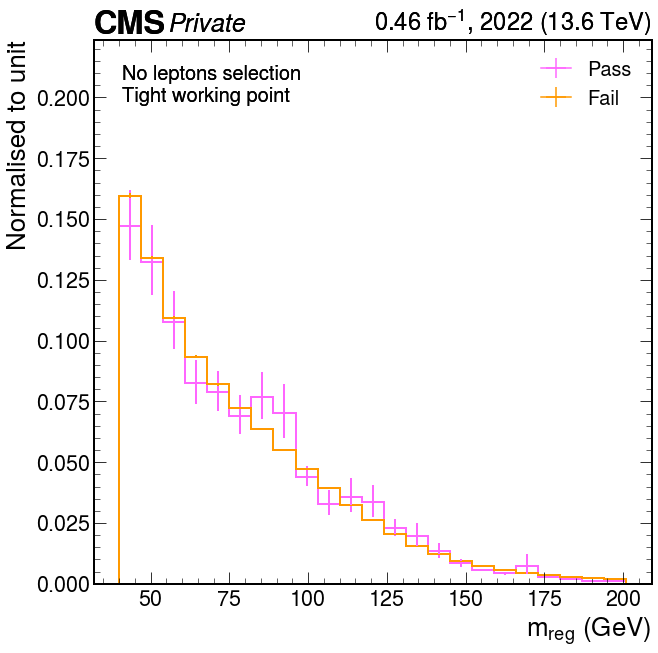

In [20]:
plt.style.use(mplhep.style.CMS)

mc = pickle.load(open(f'{out_dir}/mc.pkl','rb'))['hist']

wps = {
    1 : "Loose",
    2 : "Medium",
    3 : "Tight",
}

colours = {
    "Pass" : "#FF66FF",
    "Fail" : "#FF9900",
}

wp = 1
i_sel = -1
selections = ['Baseline','Trigger','Min. kin.', 'Jet ID','MET','No leptons']

for wp in [1, 2, 3]:

    fig, (ax) = plt.subplots(
            1, 1, figsize=(10, 10),
        )
    fig.subplots_adjust(hspace=0.1)
    ax.set_ylabel("Normalised to unit")
    ax.set_xlabel(r"$m_{reg}$ (GeV)")

    for region in ["Pass", "Fail"]:

        h = mc.project("mass", "cut", "process", "disc", "genflav", "pt")
        h = h[:, i_sel, hist.loc("QCD"), :, 0:len:sum, 0:len:sum]

        if "Pass" in region:
            h = h[:, wp:4:sum]
        else:
            h = h[:, 0:wp:sum]

        h = h[hist.rebin(1)]
        h = h / h.sum().value

        mplhep.histplot(
            h,
            ax=ax,
            label=f"{region}",
            linewidth=2,
            color=colours[region],
            flow="none",
        )

        plt.text(0.05, 0.88, f"{selections[i_sel]} selection\n{wps[wp]} working point",
                    fontsize=20,
                    horizontalalignment='left',
                    verticalalignment='bottom',
                    transform=ax.transAxes
                   )

        mplhep.cms.label(
                ax=ax, 
                data=True, 
                fontsize=25,
                label="Private",
                year=2022,
                lumi=f"{lumi/1000:.2f}",
                com=13.6,
                )

    ax.legend(loc="upper right", fontsize=20)

    ax.set_ylim(0, max(h.values()) * 1.4)

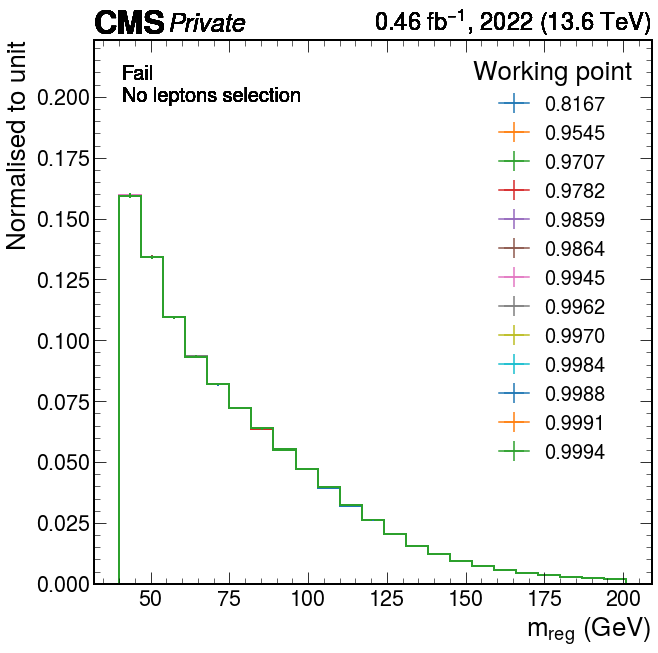

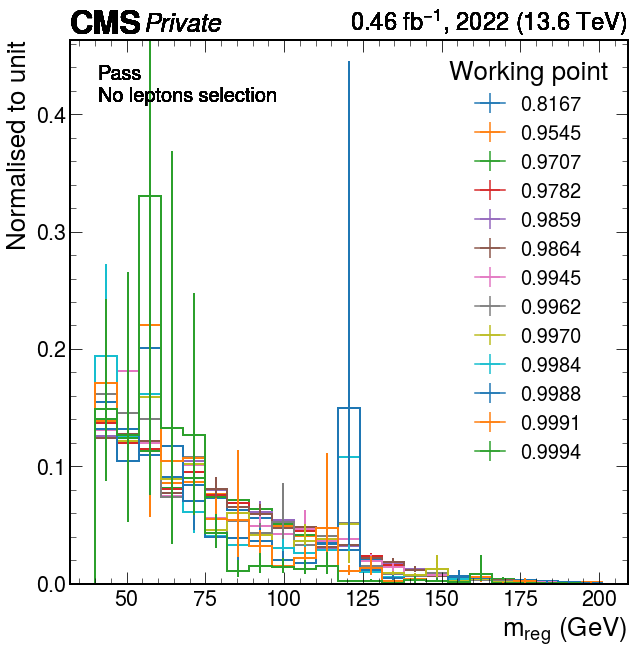

In [21]:
plt.style.use(mplhep.style.CMS)

mc = pickle.load(open(f'{out_dir}/mc.pkl','rb'))['hist']

wps = {
    1 : "Loose",
    2 : "Medium",
    3 : "Tight",
}

colours = {
    "Pass" : "#FF66FF",
    "Fail" : "#FF9900",
}

wp = 1
i_sel = -1
selections = ['Baseline','Trigger','Min. kin.', 'Jet ID','MET','No leptons']


for region in ["Fail", "Pass"]:

    fig, (ax) = plt.subplots(
        1, 1, figsize=(10, 10),
    )
    fig.subplots_adjust(hspace=0.1)
    ax.set_ylabel("Normalised to unit")
    ax.set_xlabel(r"$m_{reg}$ (GeV)")

    for i_wp, wp in enumerate(mc.project('disc').axes[0].edges[:-1]):
        
        if i_wp == 0:
            continue

        h = mc.project("mass", "cut", "process", "disc", "genflav", "pt")
        h = h[:, i_sel, hist.loc("QCD"), :, 0:len:sum, 0:len:sum]

        if "Pass" in region:
            h = h[:, i_wp:len:sum]
        else:
            h = h[:, 0:i_wp:sum]

        h = h[hist.rebin(1)]
        h = h / h.sum().value

        mplhep.histplot(
            h,
            ax=ax,
            label=f"{wp:.4f}",
            linewidth=2,
#             color=colours[region],
            flow="none",
        )

        plt.text(0.05, 0.88, f"{region}\n{selections[i_sel]} selection",
                    fontsize=20,
                    horizontalalignment='left',
                    verticalalignment='bottom',
                    transform=ax.transAxes
                   )

        mplhep.cms.label(
                ax=ax, 
                data=True, 
                fontsize=25,
                label="Private",
                year=2022,
                lumi=f"{lumi/1000:.2f}",
                com=13.6,
                )

    ax.legend(loc="upper right", fontsize=20, title="Working point")

    ax.set_ylim(0, max(h.values()) * 1.4)

# pt ranges <a class="anchor" id="pt"></a>
[TOC](#toc)

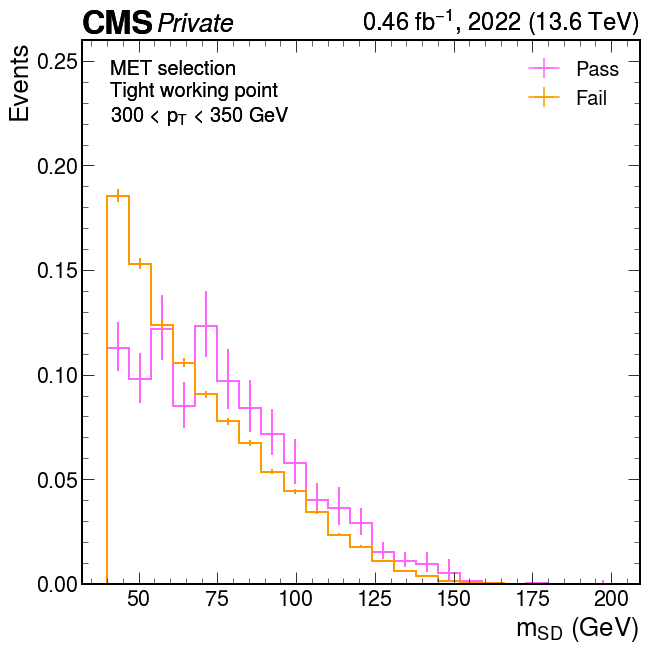

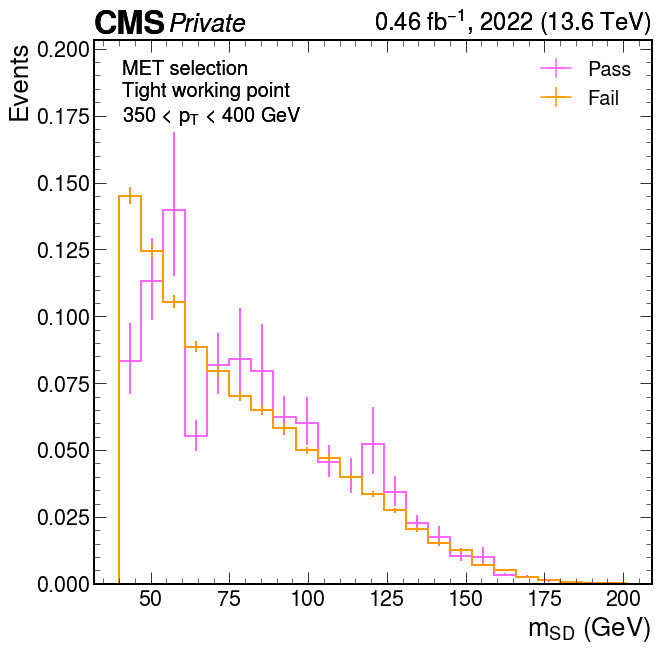

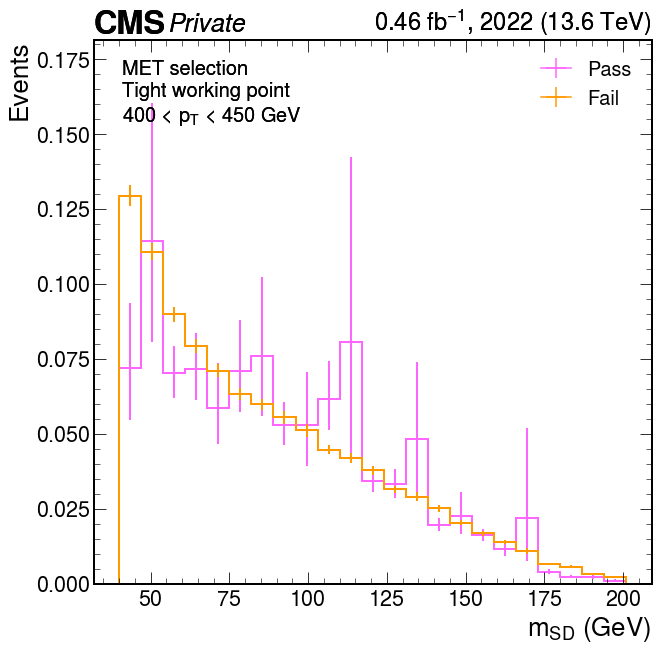

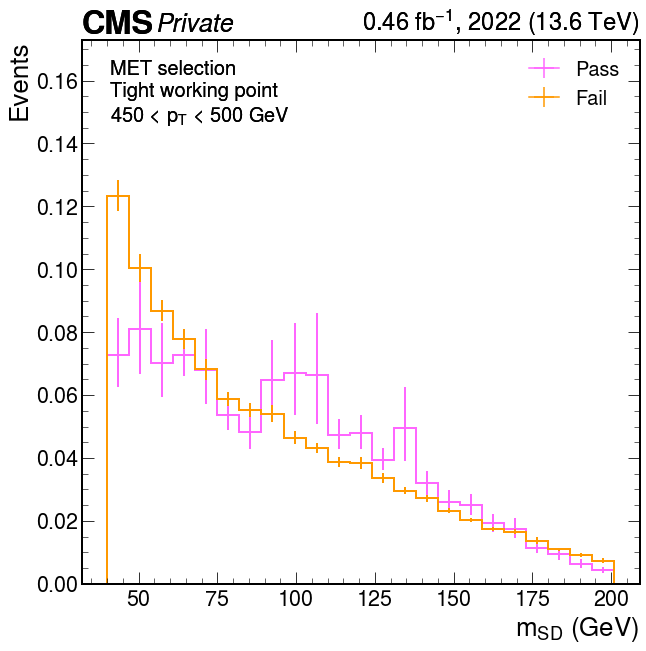

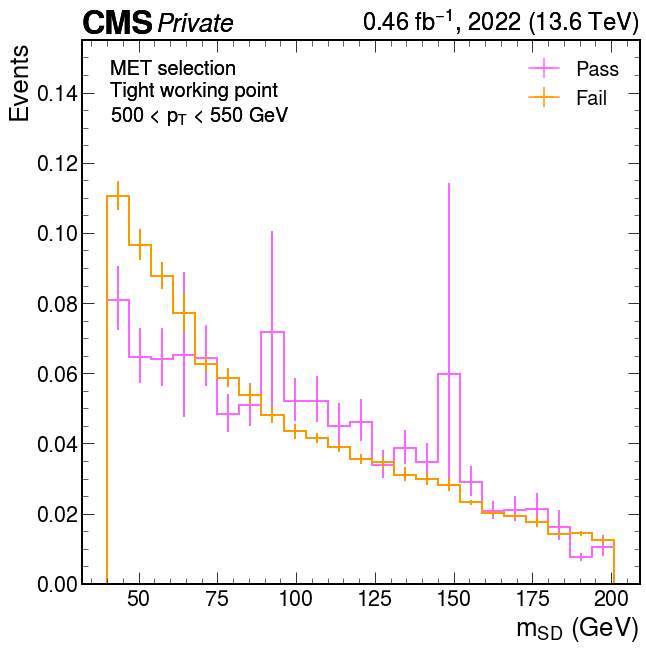

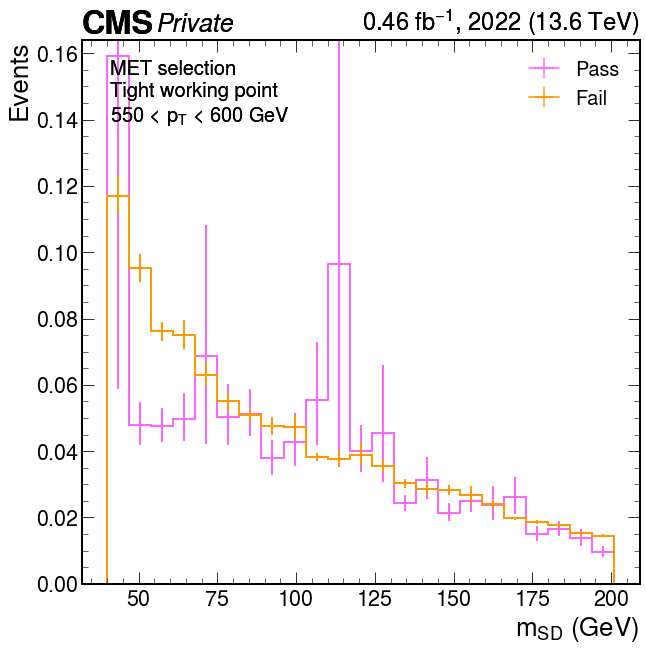

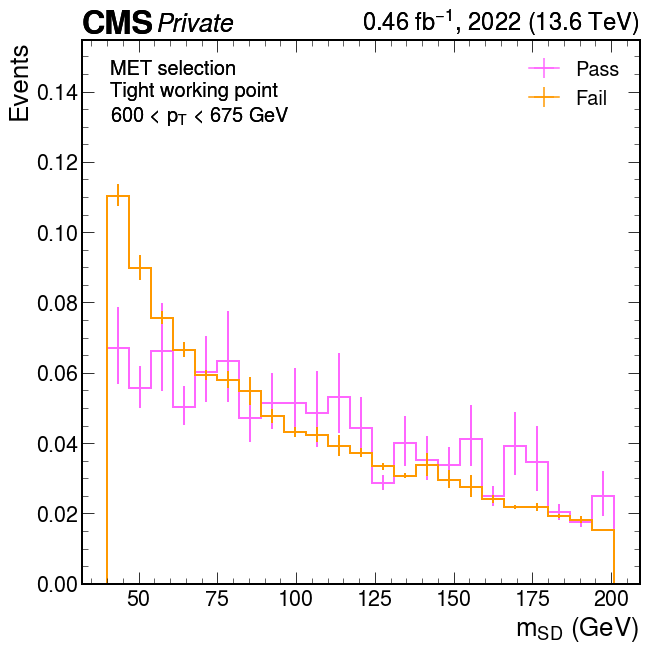

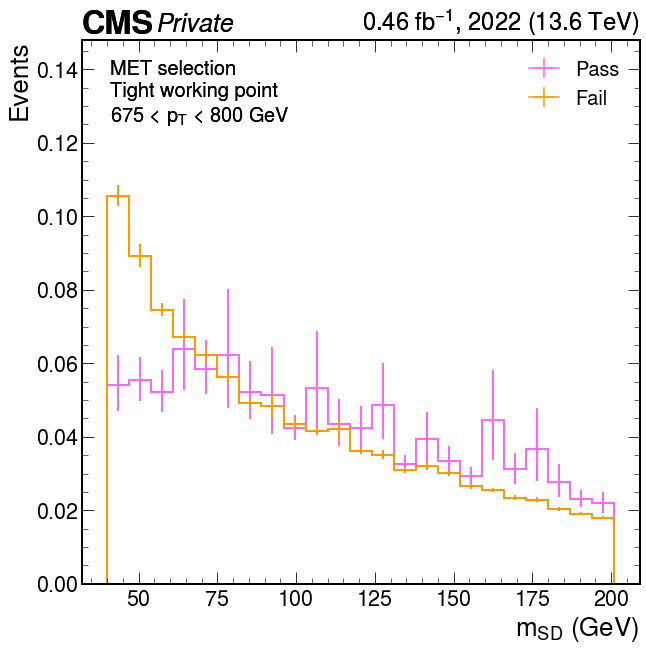

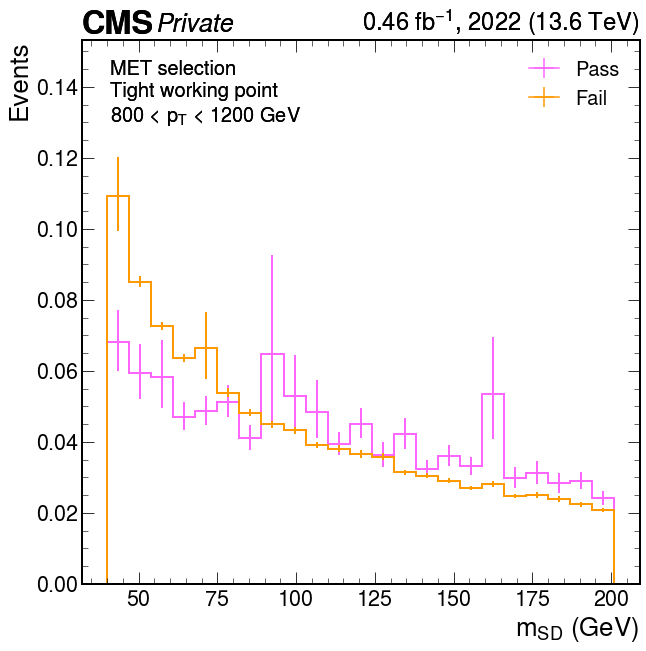

In [10]:
plt.style.use(mplhep.style.CMS)

mc = pickle.load(open(f'{out_dir}/mc.pkl','rb'))['hist']

wps = {
    1 : "Loose",
    2 : "Medium",
    3 : "Tight",
}

colours = {
    "Pass" : "#FF66FF",
    "Fail" : "#FF9900",
}

wp = 3
i_sel = 4
selections = ['Baseline','Trigger','Min. kin.', 'Jet ID','MET','No leptons']

pt_edges = mc.project("pt").axes[0].edges
pt_centers = mc.project("pt").axes[0].centers

for i_pt, _ in enumerate(pt_centers):

    fig, (ax) = plt.subplots(
            1, 1, figsize=(10, 10),
        )
    fig.subplots_adjust(hspace=0.1)
    ax.set_ylabel("Events")
    ax.set_xlabel(r"$m_{SD}$ (GeV)")

    for region in ["Pass", "Fail"]:

        h = mc.project("mass", "cut", "process", "disc", "genflav", "pt")
        h = h[:, i_sel, hist.loc("QCD"), :, 0:len:sum, i_pt:i_pt + 1:sum]

        if "Pass" in region:
            h = h[:, wp:len:sum]
        else:
            h = h[:, 0:wp:sum]

        h = h[hist.rebin(1)]
        h = h / h.sum().value

        mplhep.histplot(
            h,
            ax=ax,
            label=f"{region}",
            linewidth=2,
            color=colours[region],
            flow="none",
        )

        plt.text(0.05, 0.84, f"{selections[i_sel]} selection\n{wps[wp]} working point\n{pt_edges[i_pt]:.0f}"
                 + r" < $p_T$ < " + f"{pt_edges[i_pt + 1]:.0f} GeV",
                    fontsize=20,
                    horizontalalignment='left',
                    verticalalignment='bottom',
                    transform=ax.transAxes
                   )

        mplhep.cms.label(
                ax=ax, 
                data=True, 
                fontsize=25,
                label="Private",
                year=2022,
                lumi=f"{lumi/1000:.2f}",
                com=13.6,
                )

    ax.legend(loc="upper right", fontsize=20)

    ax.set_ylim(0, max(h.values()) * 1.4)

# N2DDT efficiency per sample <a class="anchor" id="n2ddt1"></a>
[TOC](#toc)

In [19]:
plt.style.use(mplhep.style.CMS)

mc = util.load(f"{out_dir}/dask_QCD.coffea")[0]
# "dataset" has to be first for the scaling to work
mc["hist"] = mc["hist"].project('dataset', 'reg', 'pt', 'disc', 'genflav', 'cut')

scale_lumi = {k: xs[k] * lumi / w for k, w in mc['sumw'].items()}

for i, name in enumerate(mc["hist"].axes["dataset"]):
    mc["hist"].view(flow=True)[i] *= scale_lumi[name]

df = pd.DataFrame([])
datasets = ['QCD_PT-120to170', 'QCD_PT-170to300', 'QCD_PT-300to470', 'QCD_PT-470to600', 'QCD_PT-600to800', 'QCD_PT-800to1000', 'QCD_PT-1000to1400', 'QCD_PT-1400to1800', 'QCD_PT-1800to2400', 'QCD_PT-2400to3200']

h =  mc["hist"].project('cut', 'dataset')

for dataset in datasets:
    
    df[dataset] = h[:, hist.loc(dataset)].values()
    
    df.index = ['Baseline','Trigger','Min. kin.', 'Jet ID', r'$N^{1,DDT}_2$ < 0','MET','No leptons']

for column in datasets:

    rel_percentage = []

    for i in range(len(df[column])):
        rel_percentage.append(df[column][i] / df[column][i-1 if i > 1 else 0] * 100)

    df[f"{column} (rel %)"] = rel_percentage

df.style.format("{:,.2f}")

,QCD_PT-120to170,QCD_PT-170to300,QCD_PT-300to470,QCD_PT-470to600,QCD_PT-600to800,QCD_PT-800to1000,QCD_PT-1000to1400,QCD_PT-1400to1800,QCD_PT-1800to2400,QCD_PT-2400to3200,QCD_PT-120to170 (rel %),QCD_PT-170to300 (rel %),QCD_PT-300to470 (rel %),QCD_PT-470to600 (rel %),QCD_PT-600to800 (rel %),QCD_PT-800to1000 (rel %),QCD_PT-1000to1400 (rel %),QCD_PT-1400to1800 (rel %),QCD_PT-1800to2400 (rel %),QCD_PT-2400to3200 (rel %)
Baseline,"203,597,341.05","53,470,020.24","3,534,561.36","284,922.92","82,038.82","14,135.03","4,159.06",370.42,53.19,3.56,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
Trigger,"203,597,341.05","53,470,020.24","3,534,561.36","284,922.92","82,038.82","14,135.03","4,159.06",370.42,53.19,3.56,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
Min. kin.,"52,571.44","601,295.55","707,835.00","101,630.92","30,831.58","5,169.81","1,306.52",12.77,0.35,0.00,0.03,1.12,20.03,35.67,37.58,36.57,31.41,3.45,0.66,0.11
Jet ID,"52,406.32","600,632.24","707,379.69","101,539.10","30,793.97","5,161.05","1,303.49",12.72,0.35,0.00,99.69,99.89,99.94,99.91,99.88,99.83,99.77,99.55,99.46,99.07
"$N^{1,DDT}_2$ < 0","32,777.00","287,809.56","254,320.23","26,615.75","7,148.54","1,100.91",265.62,2.41,0.08,0.00,62.54,47.92,35.95,26.21,23.21,21.33,20.38,18.97,21.51,20.64
MET,"32,570.51","284,843.30","250,488.21","25,754.84","6,772.43","1,009.85",234.53,1.46,0.04,0.00,99.37,98.97,98.49,96.77,94.74,91.73,88.30,60.71,48.33,31.90
No leptons,"28,297.20","266,298.47","241,253.44","24,742.99","6,491.71",971.79,226.59,1.41,0.03,0.00,86.88,93.49,96.31,96.07,95.85,96.23,96.62,96.04,95.72,97.46


In [27]:
plt.style.use(mplhep.style.CMS)

mc = pickle.load(open(f'{out_dir}/mc.pkl','rb'))['hist']
df = pd.DataFrame([])

h =  mc.project('cut', 'pt', 'process')[{'process' : hist.loc('QCD')}]
pt_centers = h.project('pt').axes[0].centers

for i, pt in enumerate(pt_centers):
    
    df[f'{pt:.0f}'] = h[:, i].values()
    
    df.index = ['Baseline','Trigger','Min. kin.', 'Jet ID', r'$N^{1,DDT}_2$ < 0','MET','No leptons']

for i, pt in enumerate(pt_centers):

    rel_percentage = []

    for i in range(len(df[f'{pt:.0f}'])):
        rel_percentage.append(df[f'{pt:.0f}'][i] / df[f'{pt:.0f}'][i-1 if i > 1 else 0] * 100)

    df[f"{pt:.0f} (rel %)"] = rel_percentage

df.style.format("{:,.2f}")

,325,375,425,475,525,575,638,738,1000,325 (rel %),375 (rel %),425 (rel %),475 (rel %),525 (rel %),575 (rel %),638 (rel %),738 (rel %),1000 (rel %)
Baseline,"3,695,967.84","1,453,960.56","643,664.68","312,333.85","162,147.15","91,393.55","71,231.11","46,121.59","24,465.09",100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
Trigger,"3,695,967.84","1,453,960.56","643,664.68","312,333.85","162,147.15","91,393.55","71,231.11","46,121.59","24,465.09",100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
Min. kin.,"1,047,470.36","391,826.00","169,311.89","79,956.51","39,877.22","21,598.47","15,772.22","9,510.57","4,357.27",28.34,26.95,26.30,25.60,24.59,23.63,22.14,20.62,17.81
Jet ID,"1,046,789.28","391,661.48","169,225.04","79,932.59","39,861.33","21,586.93","15,765.11","9,504.10","4,353.06",99.93,99.96,99.95,99.97,99.96,99.95,99.95,99.93,99.90
"$N^{1,DDT}_2$ < 0","279,893.71","107,806.91","48,005.24","23,042.56","11,641.37","6,337.70","4,659.39","2,803.90","1,292.42",26.74,27.53,28.37,28.83,29.20,29.36,29.56,29.50,29.69
MET,"276,432.99","106,326.67","47,097.93","22,594.13","11,361.11","6,157.01","4,480.01","2,680.63","1,204.85",98.76,98.63,98.11,98.05,97.59,97.15,96.15,95.60,93.22
No leptons,"262,273.06","100,613.88","44,467.19","21,114.33","10,601.68","5,693.53","4,099.77","2,432.71","1,078.29",94.88,94.63,94.41,93.45,93.32,92.47,91.51,90.75,89.50
